In [1]:
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
EDfit = np.loadtxt("1676302198Fitness.txt")
EDshf = np.loadtxt("1676302198ShForces.txt")
EDshm = np.loadtxt("1676302198ShMoments.txt")
EDalpha = (EDfit - EDshm)/(EDshf - EDshm)

PYshf = np.loadtxt("1676338610ShForces.txt")
PYshm = np.loadtxt("1676338610ShMoments.txt")


In [3]:
dfed = pandas.DataFrame()
dfed['shm'] = EDshm
dfed['shf'] = EDshf
dfed['shm2'] = EDshm**2
dfed['shf2'] = EDshf**2
dfed['alpha'] = EDfit
dfed.head()

,shm,shf,shm2,shf2,alpha
0,0.274183,0.756177,0.075176,0.571803,0.456207
1,0.251931,0.796635,0.063469,0.634627,0.430718
2,0.334330,0.670899,0.111777,0.450106,0.482853
3,0.277321,0.751012,0.076907,0.564019,0.458518
4,0.548962,0.441017,0.301360,0.194496,0.493885


In [4]:
dfpy = pandas.DataFrame()
dfpy['shm'] = PYshm
dfpy['shf'] = PYshf
dfpy['shm2'] = PYshm**2
dfpy['shf2'] = PYshf**2
dfpy.head()

,shm,shf,shm2,shf2
0,0.223151,0.934058,0.049796,0.872464
1,0.911201,0.157835,0.830288,0.024912
2,0.281046,0.758496,0.078987,0.575317
3,0.568112,0.429403,0.322751,0.184387
4,0.548864,0.448040,0.301252,0.200740


In [5]:
model = LinearRegression()
model.fit(dfed[['shm','shf','shm2','shf2']].values,dfed['alpha'].values)
dfpy['alpha'] = model.predict(dfpy[['shm','shf','shm2','shf2']].values)
dfed['alphap'] = model.predict(dfed[['shm','shf','shm2','shf2']].values)

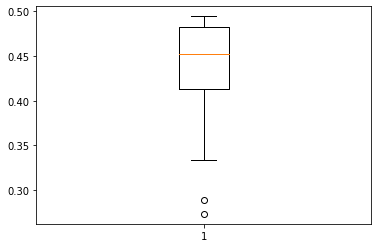

In [6]:
plt.boxplot(dfed['alpha'].values)
plt.show()

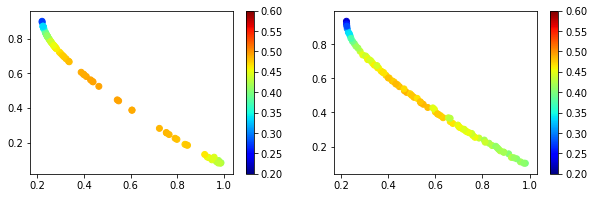

In [7]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(dfed['shm'].values,dfed['shf'].values,c=dfed['alpha'].values,cmap='jet',vmin=0.2,vmax=0.6 )
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(dfpy['shm'].values,dfpy['shf'].values,c=dfpy['alpha'].values,cmap='jet',vmin=0.2,vmax=0.6 )
plt.colorbar()
plt.show()

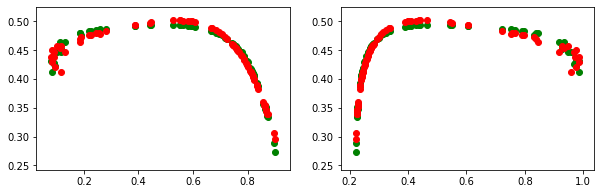

In [8]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(dfed['shf'].values,dfed['alpha'].values,c='green' )
plt.scatter(dfed['shf'].values,dfed['alphap'].values,c='red' )
plt.subplot(1,2,2)
plt.scatter(dfed['shm'].values,dfed['alpha'].values,c='green' )
plt.scatter(dfed['shm'].values,dfed['alphap'].values,c='red' )
plt.show()

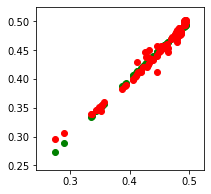

In [9]:
plt.figure(figsize=(3,3))
plt.scatter(dfed['alpha'].values,dfed['alpha'].values,c='green' )
plt.scatter(dfed['alpha'].values,dfed['alphap'].values,c='red' )
plt.show()